In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weatherRec = pd.DataFrame(pd.read_csv(r"C:\Users\hp\Downloads\Weather Records - Weather Records.csv"))

#### Checking number of NaN values in each column of dataset

In [3]:
weatherRec.isna().sum()

Type                  37
Severity              37
StartTime(UTC)         6
EndTime(UTC)           6
Precipitation(in)     54
TimeZone               6
AirportCode            6
LocationLat           12
LocationLng           12
City                 145
County               145
State                166
ZipCode               19
dtype: int64

#### Checking if there are duplicate rows and dropping them

In [4]:
print(weatherRec.duplicated().sum())

2


In [5]:
weatherRec = weatherRec.drop_duplicates().reset_index(drop=True)
print(weatherRec.duplicated().sum())

0


#### Handling missing values

In [6]:
# Fill missing values for categorical columns using mode
weatherRec = weatherRec.assign(
    Type=weatherRec["Type"].fillna(weatherRec["Type"].mode()[0]),
    Severity=weatherRec["Severity"].fillna(weatherRec["Severity"].mode()[0]),
    Precipitation=weatherRec["Precipitation(in)"].fillna(0),
)

# Drop rows with missing start or end times
# A missing start time makes the record unreliable for analysis. 
# Dropping such rows ensures accurate time-based calculations.
# NaN values are only 6 so will not affect analysis
weatherRec = weatherRec.dropna(subset=["StartTime(UTC)", "EndTime(UTC)"])

# Use forward and backward fill for location-based values
# If missing values appear in between rows with valid values, forward fill will copy the last known value.
# If missing values are at the start, backward fill will take the next available value.
# This ensures continuity without introducing incorrect assumptions.
weatherRec["LocationLat"] = weatherRec["LocationLat"].ffill().bfill()
weatherRec["LocationLng"] = weatherRec["LocationLng"].ffill().bfill()

# Fill missing values with the most frequent (mode) value for categorical location-based column
for col in ["City", "County", "State", "ZipCode"]:
    most_frequent_value = weatherRec[col].mode()[0]
    weatherRec[col] = weatherRec[col].fillna(most_frequent_value)

In [7]:
weatherRec.isna().sum()

Type                  0
Severity              0
StartTime(UTC)        0
EndTime(UTC)          0
Precipitation(in)    48
TimeZone              0
AirportCode           0
LocationLat           0
LocationLng           0
City                  0
County                0
State                 0
ZipCode               0
Precipitation         0
dtype: int64

#### Feature Engineering for Date Column

In [8]:
weatherRec['StartTime(UTC)'] = pd.to_datetime(weatherRec['StartTime(UTC)'], format="%m/%d/%y %H:%M", errors="coerce")
weatherRec['EndTime(UTC)'] = pd.to_datetime(weatherRec['EndTime(UTC)'], format="%m/%d/%y %H:%M", errors="coerce")
weatherRec['Hour'] = weatherRec['StartTime(UTC)'].dt.hour
weatherRec['DayOfWeek'] = weatherRec['StartTime(UTC)'].dt.dayofweek
weatherRec['Month'] = weatherRec['StartTime(UTC)'].dt.month

# 1. Hour of the Day
# Helps identify time-based patterns in weather events.
# Example Insights:
#     Are certain weather events (e.g., fog, snow) more frequent at night or early morning?
#     Do severe events occur more during peak traffic hours?
# Useful for forecasting and planning.

# 2. Day of the Week
# Helps determine if weather events have a weekly pattern.
# Example Insights:
#     Are storms or snowfall more common on weekends?
#     Does precipitation vary between weekdays and weekends?
# Useful for travel, event planning, and risk assessment.

# 3. Month
# Helps analyze seasonal trends in weather.
# Example Insights:
#     Are there months with high precipitation? (e.g., monsoon season)
#     Does snowfall peak in winter months?
# Essential for long-term climate and trend analysis.

# Practical Use in Machine Learning:
# These extracted features can be used as predictors in ML models.
# Example:
#     A model predicting Precipitation(in) may find that certain months have higher precipitation probabilities.

#### Visualizations

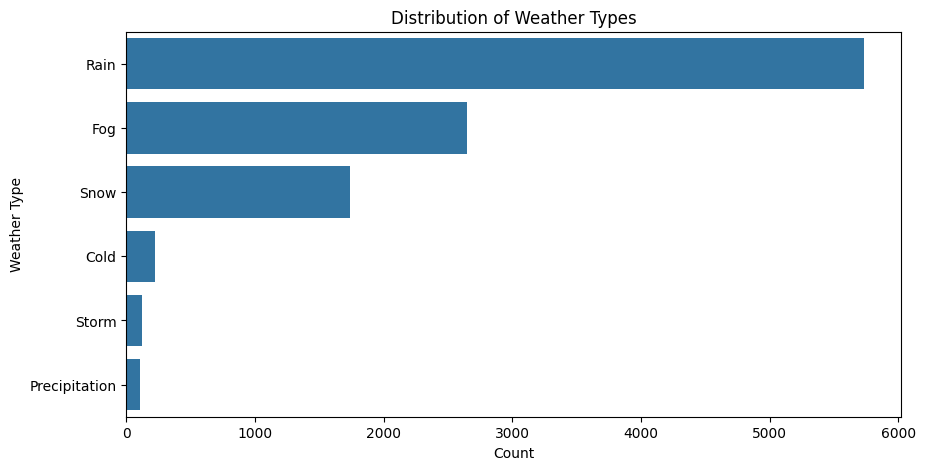

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(y=weatherRec["Type"], order=weatherRec["Type"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Weather Type")
plt.title("Distribution of Weather Types")
plt.show()
# To see the most common weather events.

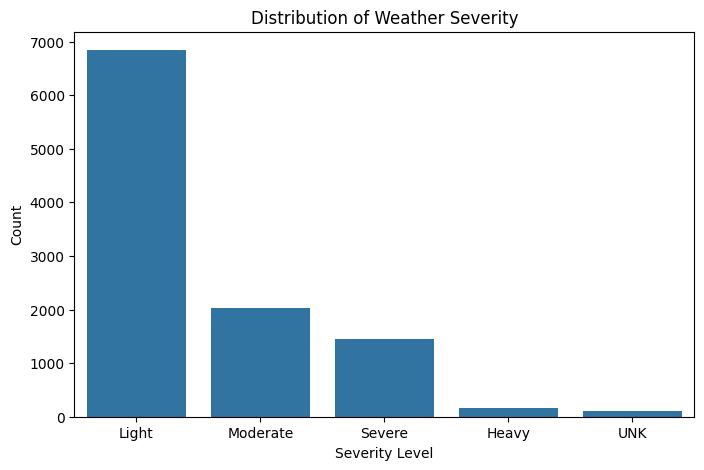

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x=weatherRec["Severity"], order=weatherRec["Severity"].value_counts().index)
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.title("Distribution of Weather Severity")
plt.show()
# To analyze the distribution of severity levels.

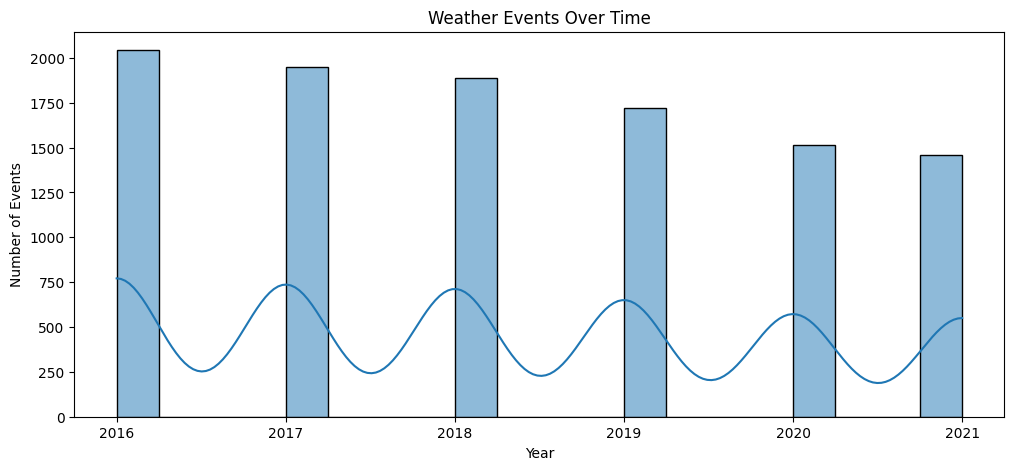

In [11]:
weatherRec["StartTime(UTC)"] = pd.to_datetime(weatherRec["StartTime(UTC)"])
weatherRec["Year"] = weatherRec["StartTime(UTC)"].dt.year

plt.figure(figsize=(12, 5))
sns.histplot(weatherRec["Year"], bins=20, kde=True)
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.title("Weather Events Over Time")
plt.show()
#  To see seasonal/weather trends over the years.

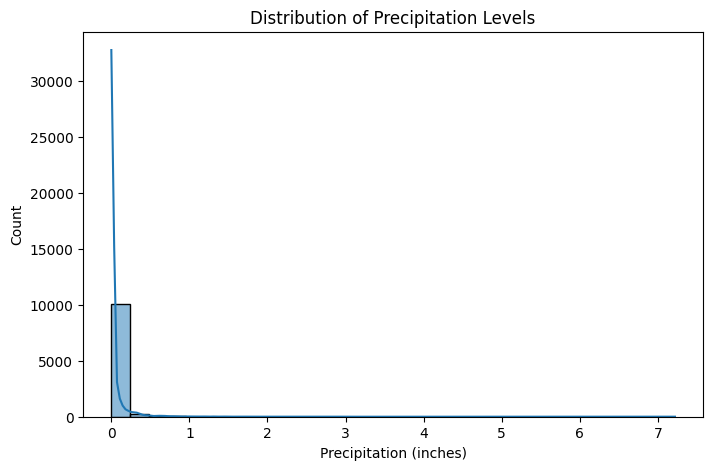

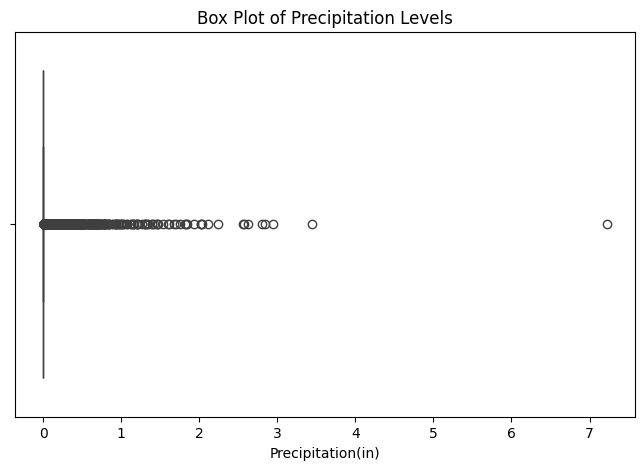

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(weatherRec["Precipitation(in)"], bins=30, kde=True)
plt.xlabel("Precipitation (inches)")
plt.ylabel("Count")
plt.title("Distribution of Precipitation Levels")
plt.show()

# Box plot to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=weatherRec["Precipitation(in)"])
plt.title("Box Plot of Precipitation Levels")
plt.show()

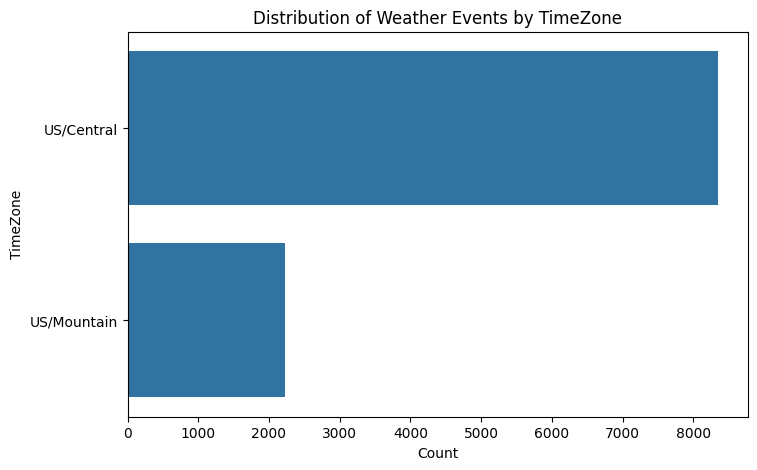

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(y=weatherRec["TimeZone"], order=weatherRec["TimeZone"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("TimeZone")
plt.title("Distribution of Weather Events by TimeZone")
plt.show()


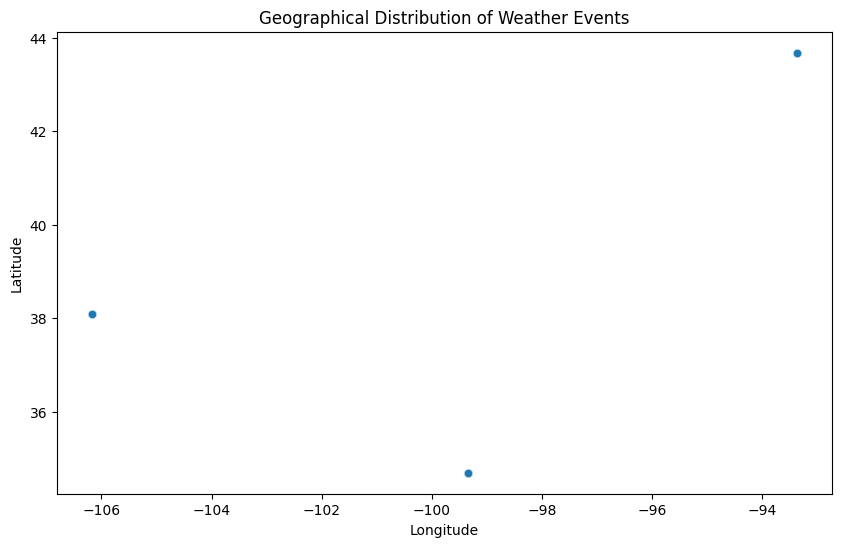

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=weatherRec["LocationLng"], y=weatherRec["LocationLat"], alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Weather Events")
plt.show()


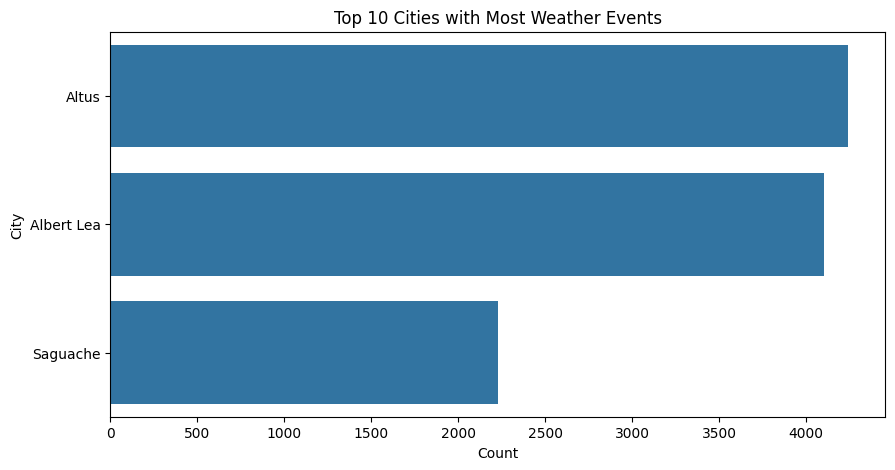

In [15]:
top_cities = weatherRec["City"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.xlabel("Count")
plt.ylabel("City")
plt.title("Top 10 Cities with Most Weather Events")
plt.show()


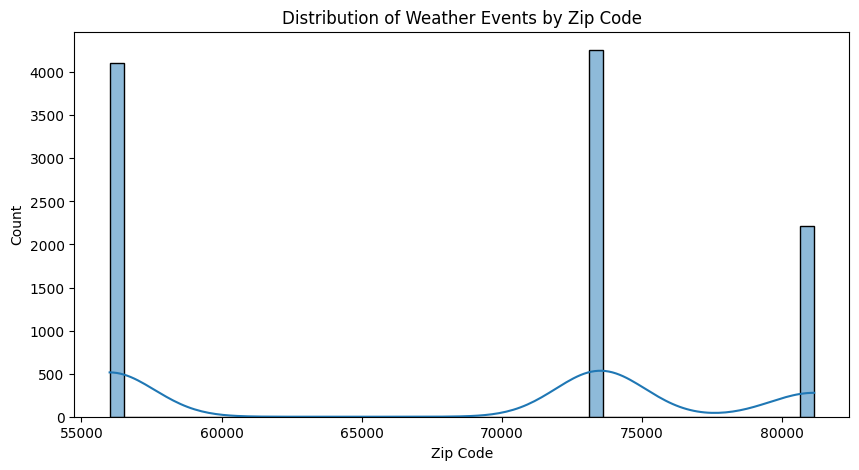

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(weatherRec["ZipCode"], bins=50, kde=True)
plt.xlabel("Zip Code")
plt.ylabel("Count")
plt.title("Distribution of Weather Events by Zip Code")
plt.show()

#### Advanced Feature Engineering

In [17]:
weatherRec["Duration"] = (weatherRec["EndTime(UTC)"] - weatherRec["StartTime(UTC)"]).dt.total_seconds() / 3600

In [18]:
weatherRec

,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,Precipitation,Hour,DayOfWeek,Month,Year,Duration
0,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,0.00,23,2,1,2016,1.333333
1,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,0.00,4,3,1,2016,0.666667
2,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,0.03,5,3,1,2016,9.666667
3,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,0.00,5,4,1,2016,0.333333
4,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,0.00,13,4,1,2016,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10575,Fog,Severe,2021-12-27 09:55:00,2021-12-27 12:15:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,Freeborn,MN,56007.0,0.00,9,0,12,2021,2.333333
10576,Snow,Light,2021-12-28 15:55:00,2021-12-28 19:35:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,Freeborn,MN,56007.0,0.00,15,1,12,2021,3.666667
10577,Snow,Light,2021-12-29 02:35:00,2021-12-29 02:55:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,Freeborn,MN,56007.0,0.00,2,2,12,2021,0.333333
10578,Snow,Light,2021-12-30 07:55:00,2021-12-30 10:55:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,Freeborn,MN,56007.0,0.00,7,3,12,2021,3.000000


In [19]:
# Extract Month
weatherRec["Month"] = weatherRec["StartTime(UTC)"].dt.month

# Define seasons
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

weatherRec["Season"] = weatherRec["Month"].apply(assign_season)

In [20]:
weatherRec

,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,Precipitation,Hour,DayOfWeek,Month,Year,Duration,Season
0,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,0.00,23,2,1,2016,1.333333,Winter
1,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,0.00,4,3,1,2016,0.666667,Winter
2,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,0.03,5,3,1,2016,9.666667,Winter
3,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,0.00,5,4,1,2016,0.333333,Winter
4,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,0.00,13,4,1,2016,2.000000,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10575,Fog,Severe,2021-12-27 09:55:00,2021-12-27 12:15:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,Freeborn,MN,56007.0,0.00,9,0,12,2021,2.333333,Winter
10576,Snow,Light,2021-12-28 15:55:00,2021-12-28 19:35:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,Freeborn,MN,56007.0,0.00,15,1,12,2021,3.666667,Winter
10577,Snow,Light,2021-12-29 02:35:00,2021-12-29 02:55:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,Freeborn,MN,56007.0,0.00,2,2,12,2021,0.333333,Winter
10578,Snow,Light,2021-12-30 07:55:00,2021-12-30 10:55:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,Freeborn,MN,56007.0,0.00,7,3,12,2021,3.000000,Winter


In [21]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding
le = LabelEncoder()
weatherRec["Severity_Encoded"] = le.fit_transform(weatherRec["Severity"])

# why label encoding? because severity has an inherent order

#### Correlation Analysis

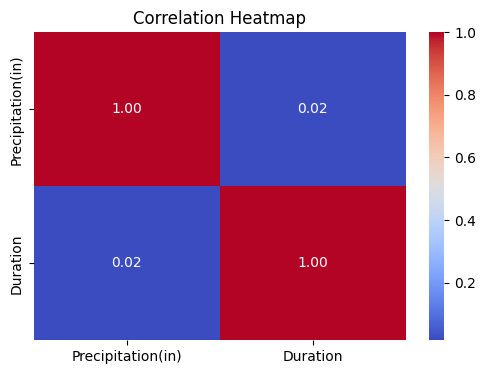

In [24]:
# Calculate Duration in hours
weatherRec['Duration'] = (weatherRec['EndTime(UTC)'] - weatherRec['StartTime(UTC)']).dt.total_seconds() / 3600

# Compute correlation
correlation = weatherRec[['Precipitation(in)', 'Duration']].corr()

# Plot Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Insights:

    If the correlation is positive, it means that higher precipitation is associated with longer weather events.
    If the correlation is negative, it suggests that events with high precipitation tend to be shorter.
    If the correlation is close to zero, it indicates little to no relationship.

#### Outlier Detection

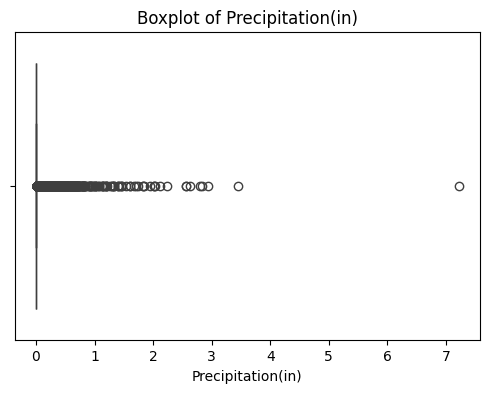

Number of outliers detected: 2500


In [25]:
# Calculate IQR
Q1 = weatherRec['Precipitation(in)'].quantile(0.25)
Q3 = weatherRec['Precipitation(in)'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = weatherRec[(weatherRec['Precipitation(in)'] < lower_bound) | (weatherRec['Precipitation(in)'] > upper_bound)]

# Plot Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=weatherRec['Precipitation(in)'])
plt.title("Boxplot of Precipitation(in)")
plt.show()

# Print the number of outliers
print(f"Number of outliers detected: {len(outliers)}")

### Handling Outliers:

    Option 1: Remove extreme outliers if they seem like data entry errors.
    Option 2: Cap values at upper/lower bounds to prevent distortion.

#### Geospatial Analysis

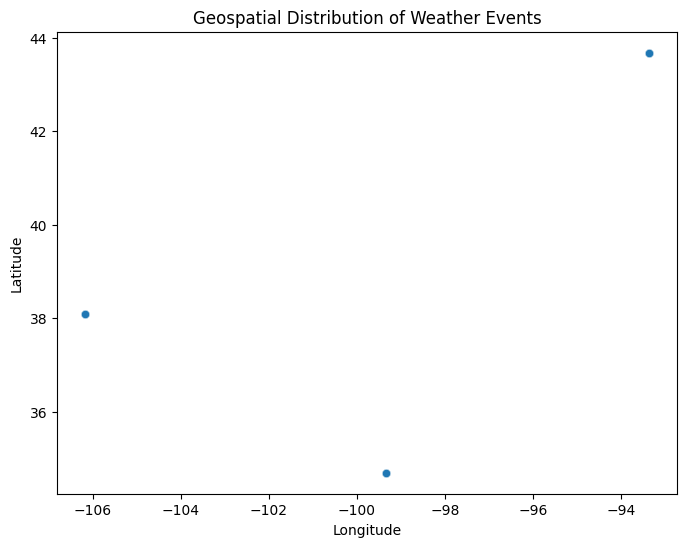

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=weatherRec['LocationLng'], y=weatherRec['LocationLat'], alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Distribution of Weather Events")
plt.show()

Clustering in Specific Regions

    Weather events appear densely concentrated in certain areas, suggesting that some locations experience frequent weather disturbances.
    This could be due to climatic conditions, geographical terrain, or reporting biases (e.g., data collected from specific weather stations or airports).

Sparse Regions

    Some areas have fewer recorded weather events, possibly due to lower population density or fewer monitoring stations rather than a lack of actual weather activity.